<a href="https://colab.research.google.com/github/Fra3005/Computer-Vision/blob/main/KmeansEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3D rapresentation

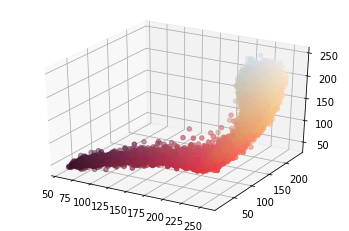

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from PIL import Image
import cv2
im = Image.open("skin.jpeg")
im.thumbnail((300,300))
px = im.load()
ax = plt.axes(projection = '3d')
x = []
y = []
z = []
c = []
for row in range(0,im.height):
     for col in range(0, im.width):
         pix = px[col,row]
         newCol = (pix[0] / 255, pix[1] / 255, pix[2] / 255)
         
         if(not newCol in c):
            x.append(pix[0])
            y.append(pix[1])
            z.append(pix[2])
            c.append(newCol)
ax.scatter(x,y,z, c = c)
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

w,h = im.size
colors = im.getcolors(w*h)
num_colors = len(colors)
num_pixels = w*h

print('Number of pixels = ', num_pixels)
print('Number of colors = ', num_colors)

img = np.asarray(im, dtype = np.float32)/255
plt.figure(figsize=(12,12))


Number of pixels =  69300
Number of colors =  40484


<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [ ]:
X = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
print(X.shape)

(69300, 3)


In [ ]:
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(n_clusters=2)

#K-means whit 2 cluster

centroid shape:  (2, 3)
labels shape:  (69300,)
X compressed (69300, 3)
reshaped  (231, 300, 3)


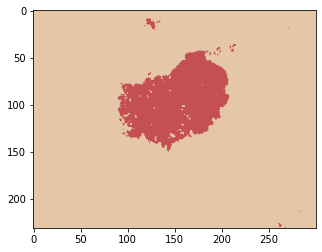

In [ ]:
centroids = km.cluster_centers_
labels = km.labels_
print('centroid shape: ', centroids.shape)
print('labels shape: ', labels.shape)

X_compressed = centroids[labels]
print('X compressed', X_compressed.shape)

X_compressed = X_compressed.reshape(img.shape[0], img.shape[1], img.shape[2])
print('reshaped ', X_compressed.shape)

plt.imshow(X_compressed)
plt.show()

#Apply silhouette index

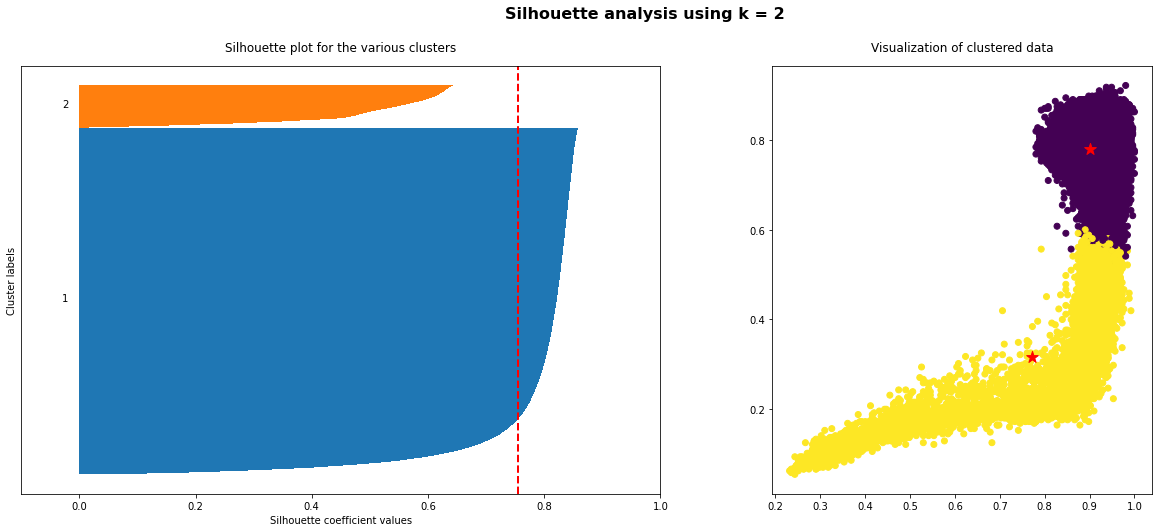

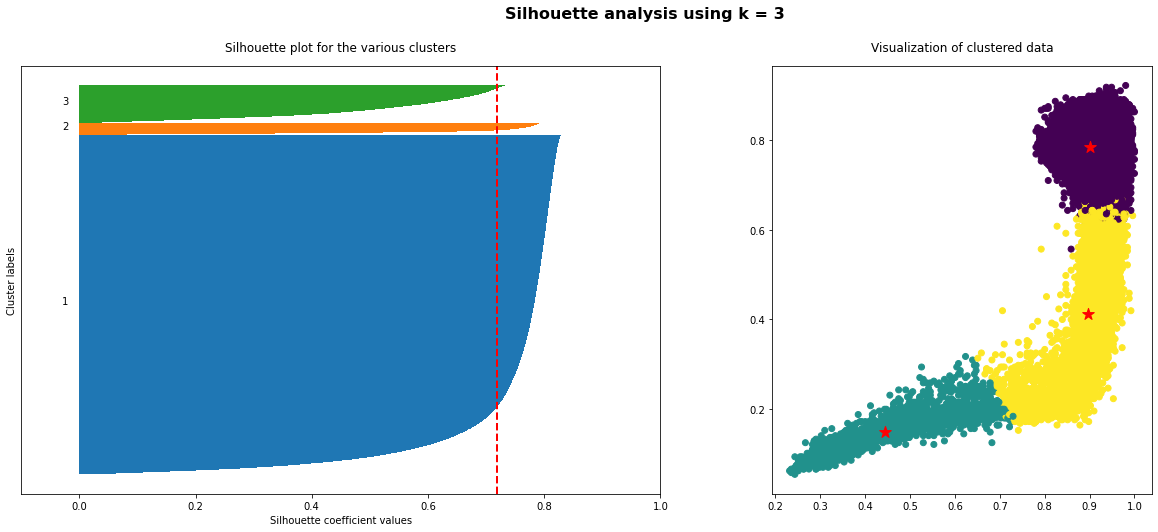

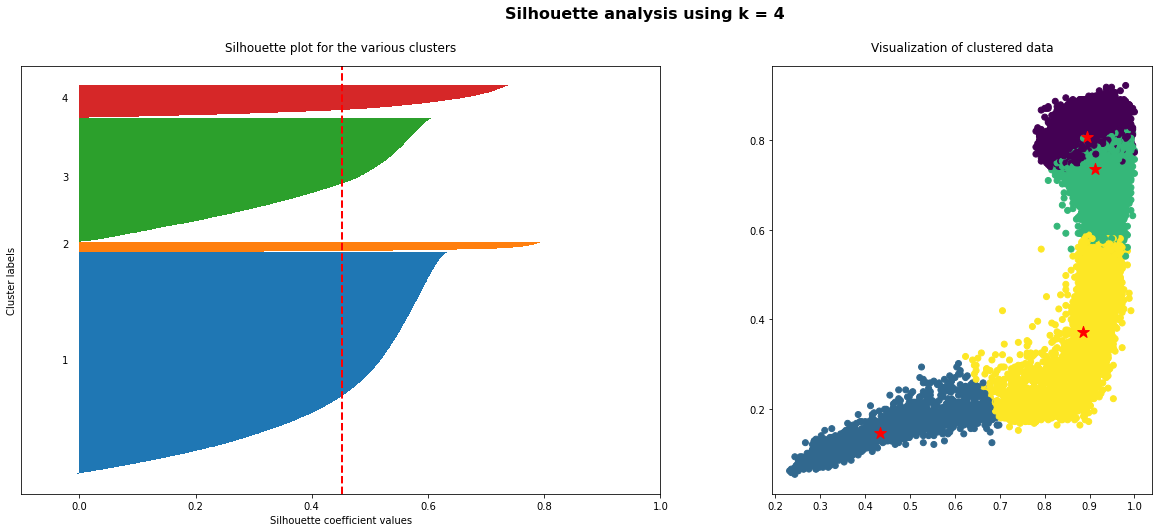

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='red')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X[:, 0], X[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=150)
    #ax2.set_xlim([-2, 2])
    #ax2.set_xlim([-2, 2])
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

#Now i'm trying to apply K-means and silhuette index whit another image

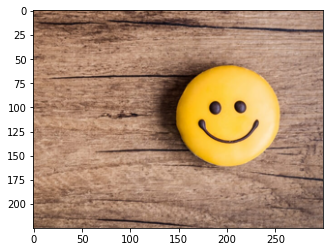

In [ ]:
img = Image.open("immagini-felicità.jpg")
img.thumbnail((300,300))

plt.imshow(img)

In [ ]:
Img_compressed = img.reshape(img.shape[0] * img.shape[1], img.shape[2])


(67500, 3)


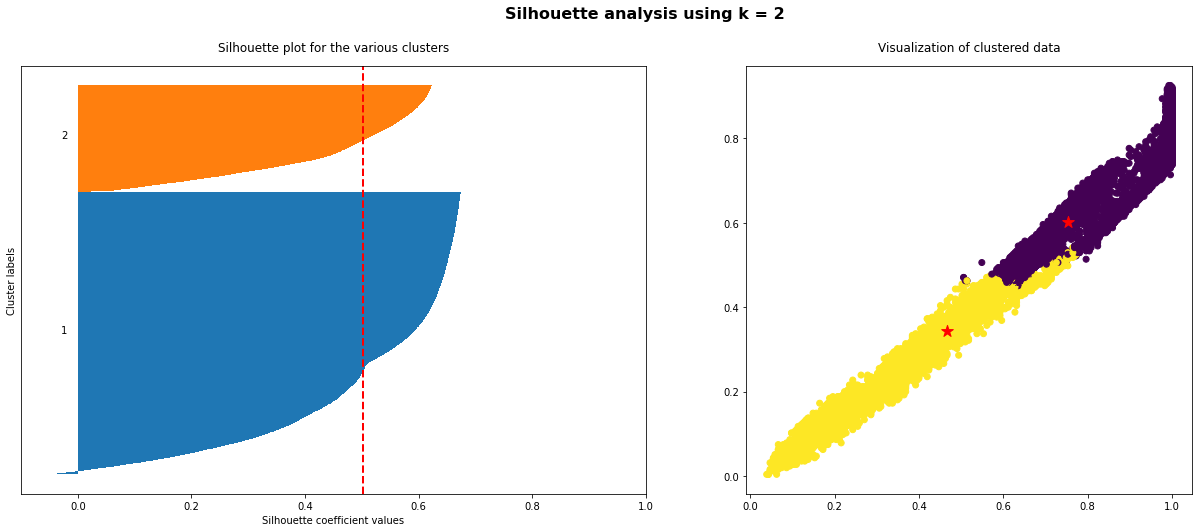

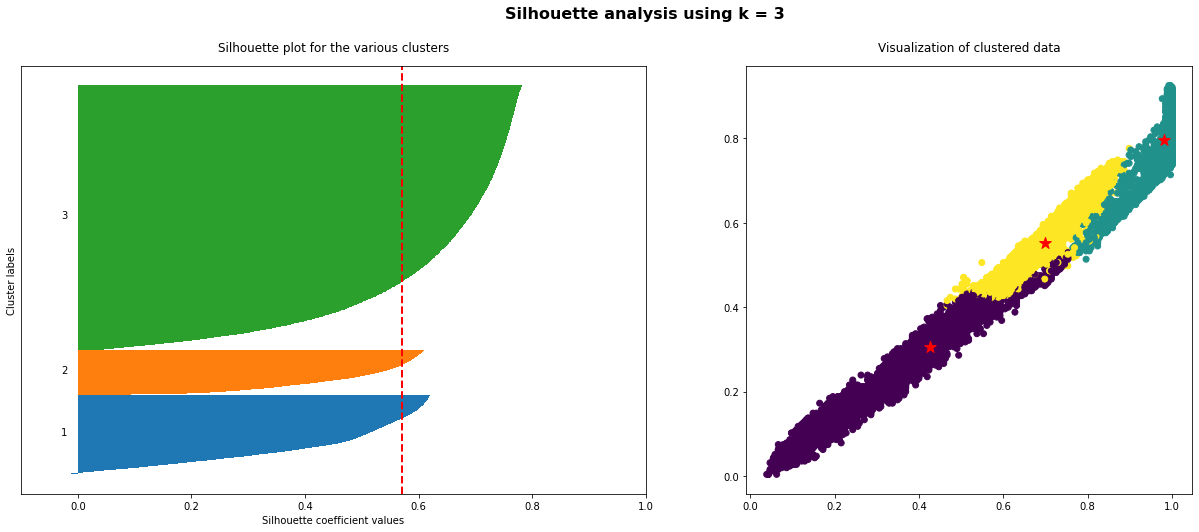

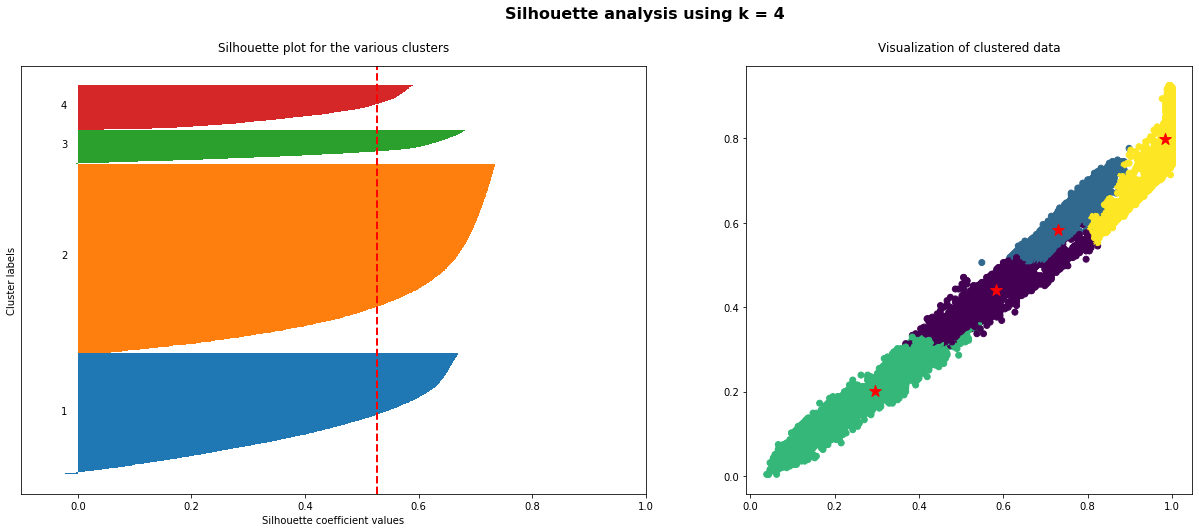

In [ ]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(Img_compressed)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(Img_compressed, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='red')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X[:, 0], X[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=150)
    #ax2.set_xlim([-2, 2])
    #ax2.set_xlim([-2, 2])
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);